# Libraries

In [1]:
import numpy as np
from omegaconf import OmegaConf
import models
import loss_func
import train
import loader
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn

import Data.genData as genData

# Load Data

[[0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5
  1.  0. ]
 [1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.5
  1.  0. ]
 [1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  0.  0.  0.  0.


<Figure size 640x480 with 0 Axes>

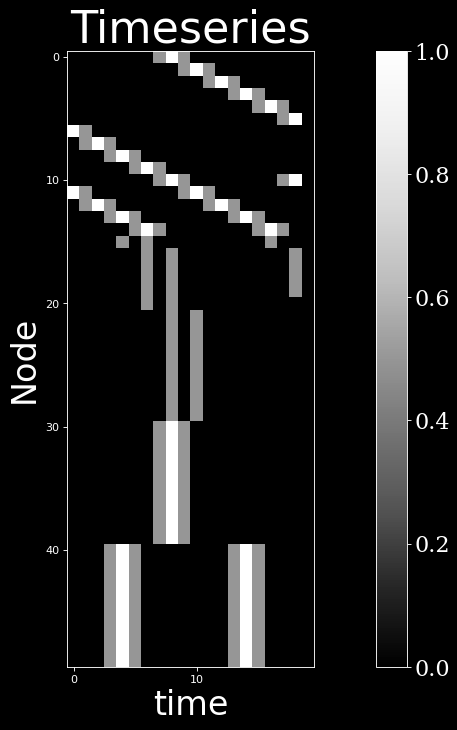

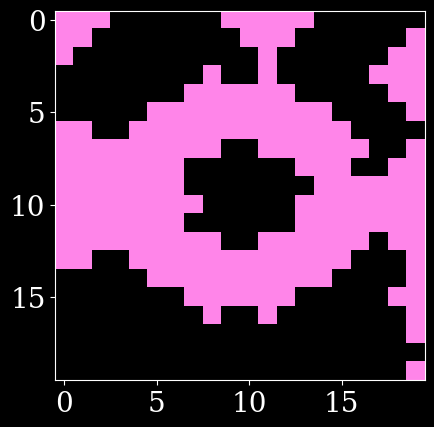

In [2]:
genData.genData()

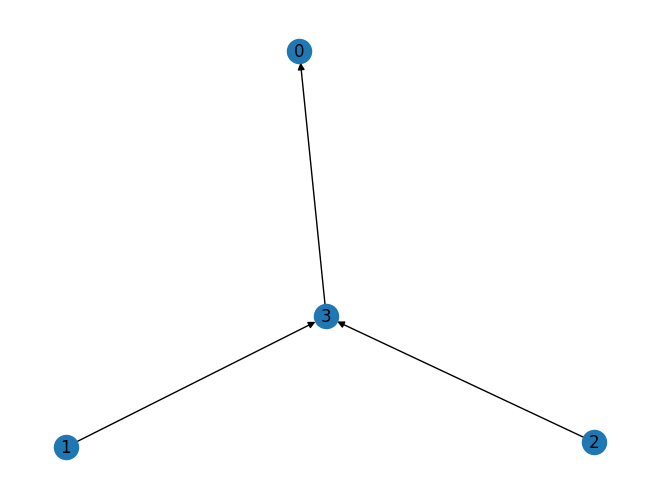

In [3]:
A = np.array([[0,0,0,0],
              [0,0,0,1],
              [0,0,0,1],
              [1,0,0,0]])

G = nx.DiGraph(A) # create graph from adjacency matrix  
    #pos = nx.spectral_layout(G)
nx.draw(G,  with_labels=True) # draw graph

In [4]:


nconn= np.sum(A, axis=0)
nconn[nconn==0] = 1
print(nconn)
x0 = np.array([0,0.5,1,0], dtype=float)
samples= 8
timeseries = np.zeros((4,samples*2))
timeseries[:,0] = x0    
x_inter = np.zeros_like(x1)
for i in range(1,2*samples-1,2):

    print(i)

    x1 = A.T@x0
    
    x_prop_inter = A.T@x_inter

    x_prop_inter = x_prop_inter/nconn   

    x1 = x1/nconn

    x1[x1 + x_prop_inter <=0.5] = 0

    x_inter = np.zeros_like(x1)
    x_inter[x0==1] = 0.5
    x_inter[x1==1] = 0.5
    #x1[x0==1] = 0.5
    
    timeseries[:,i] = x_inter

    timeseries[:,i+1] = x1

    #i = i+2

    x0 = x1

print(timeseries)

[1 1 1 2]


NameError: name 'x1' is not defined

In [ ]:
x0 = np.array([0, 1, 1, 0, 1])
x1 = np.array([0.2, 0.3, 0.4, 0.5, 0.6])

# Set x1 to 0.5 where x0 is 1
x1[x0 == 1] = 0.5

print(x1)

In [ ]:
cfg = OmegaConf.load("config.yaml")
cmd_cfg = OmegaConf.from_cli()
cfg = OmegaConf.merge(cfg, cmd_cfg)
print(OmegaConf.to_yaml(cfg))

In [ ]:
timeseries = np.random.rand(10, 1000)

train_loader, val_loader, test_loader = loader.generateLoaders(timeseries, 'pearson')

In [ ]:
window = 20
model = models.Net(window, 1, 32)

lossfn = loss_func.getLoss()

import torch

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model, train_losses, val_losses, accuracy_list  = train.train(model, train_loader, val_loader, optimizer)